### Notebook structure

- **Instructions**: set of important informations to understand the structure of the code and how to make it work.
- **Excercise 06.01**: Simulations of the Ising model with Metropolis and Gibbs Sampling

## Instructions

Intruction to C++ compilation and executions .

- To compile the code run in the directory 'es_06.1' the command :  `make`. 
- To automatically execute the code run :  `make run`.
- To clear the files `.o`  please run `make clean`.
- The code generates output files in two main directories: 'output_metro' and 'output_gibbs'. Inside each of these output directories, you will find subdirectories for different values of the parameter 'h'.
    - For h=0.00, there will be a subdirectory named 'h_0.00'.
    - For h=0.02, there will be a subdirectory named 'h_0.02'.

## Excercise 06.1


In Statistical Mechanics the one-dimensional (1D) Ising Model is exactly resoluble. The Hamiltonian for a system of N spins with nearest neighbors interaction is given by (in the following I will assume units such that $\mu_B=1$ and $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$.

The partition function for $N$ spins, $Z$, can be exactly computed and it turns out to be:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
Once the partition function has been computed, the Helmholtz free energy is readly obtained as $A = -k_B T \ln Z$. All the thermodynamic quantities of interest can be deduced from $A$ or, equivalently, from $Z$:

- the **Internal Energy** per spin (with $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

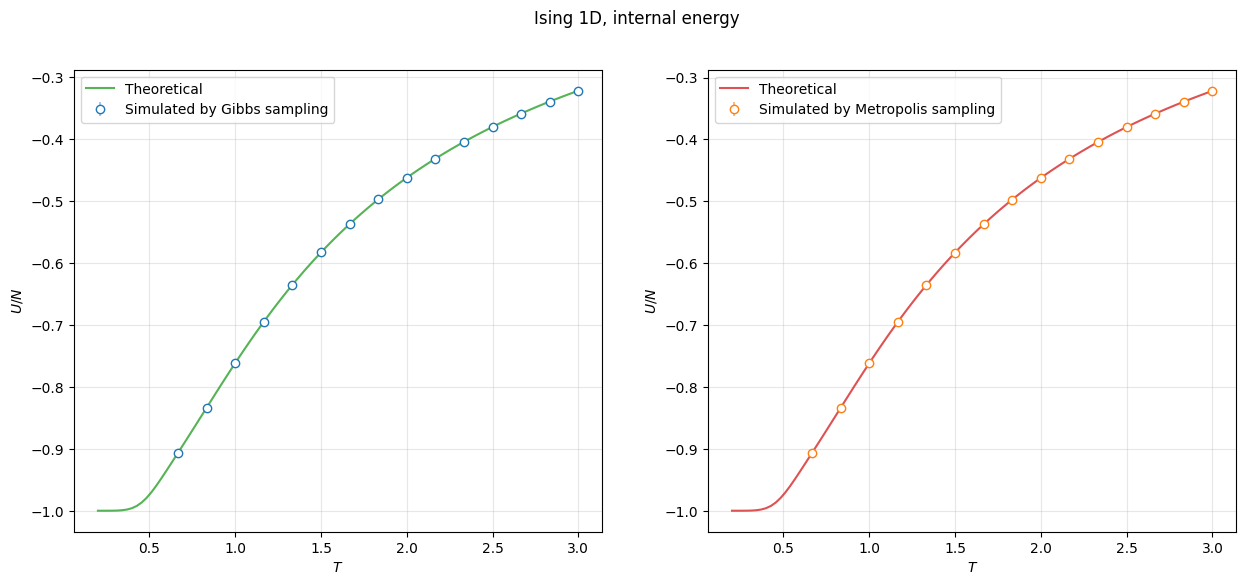

In [90]:
import numpy as np
import matplotlib.pyplot as plt

points = 100
T = np.linspace(0.2, 3.0, num=points)
beta = 1 / T
J = 1.0
Ns = 50
th = np.tanh(J / T)
thN = th**Ns
ch = 1 / th
e = -J * (th + ch * thN) / (1 + thN)

out_dir = ['es_06.1/output_gibbs/h_0.00', 'es_06.1/output_metro/h_0.00']
labels = ['Simulated by Gibbs sampling', 'Simulated by Metropolis sampling']
cm = plt.get_cmap('tab20')

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
for i in range(2):
    data = np.loadtxt(out_dir[i] + '/output_ene.dat')
    ax[i].errorbar(data[:, 0], data[:, 2], yerr=data[:, 3], color=cm(2*i), ecolor=cm(2*i+1), label=labels[i], linestyle='', marker='o',mfc='w')
    ax[i].plot(T, e, label='Theoretical',color=cm(4+2*i),alpha=0.8)
    ax[i].set_xlabel('$T$')  
    ax[i].set_ylabel('$U/N$')  
    ax[i].legend()  
    ax[i].grid('-',alpha=0.3)
    
fig.suptitle('Ising 1D, internal energy')

plt.show()


- the **Heat Capacity** (with $h=0$):

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] = \\
= -k_B\beta^2 \left[ -\sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \sum_{\{ s_i \}} H \exp \left( -\beta H\right)\frac{\partial Z^{-1}}{\partial \beta} \right] = \\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]\frac{1}{Z}\frac{\partial Z}{\partial \beta} \right\} =\\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

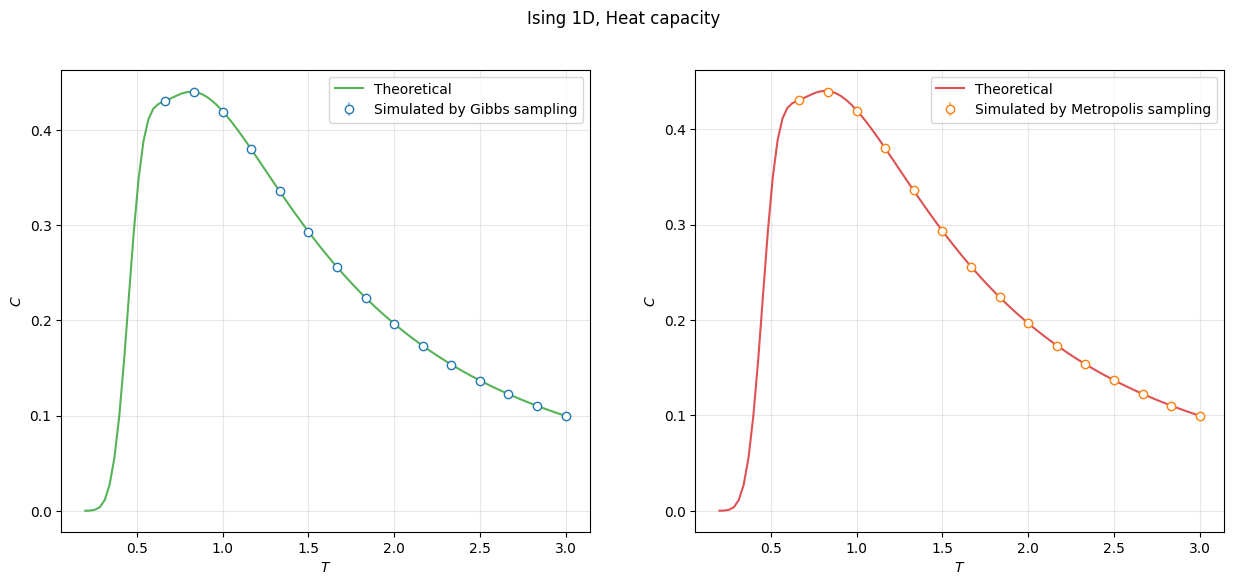

In [91]:
import numpy as np
import matplotlib.pyplot as plt


points = 100
T = np.linspace(0.2, 3.0, num=points)
beta = 1 / T
J = 1.0
Ns = 50
th = np.tanh(J / T)
thN = th**Ns
ch = 1 / th
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

out_dir = ['es_06.1/output_gibbs/h_0.00', 'es_06.1/output_metro/h_0.00']
labels = ['Simulated by Gibbs sampling', 'Simulated by Metropolis sampling']
cm = plt.get_cmap('tab20')

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
for i in range(2):
    data = np.loadtxt(out_dir[i] + '/output_heat.dat')
    ax[i].errorbar(data[:, 0], data[:, 2], yerr=data[:, 3], color=cm(2*i), ecolor=cm(2*i+1), label=labels[i], linestyle='', marker='o',mfc='w')
    ax[i].plot(T, heat, label='Theoretical',color=cm(4+2*i),alpha=0.8)
    ax[i].set_xlabel('$T$')  
    ax[i].set_ylabel('$C$')  
    ax[i].legend()  
    ax[i].grid('-',alpha=0.3)
    
fig.suptitle('Ising 1D, Heat capacity')

plt.show()


- The **magnetization** (with $h \not= 0$):

Note that with $h=0$ the magnetization $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ because in 1D we cannot have a (ferromagnetic) phase transition in absence of an external magnetic field.

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

The exact formula from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$


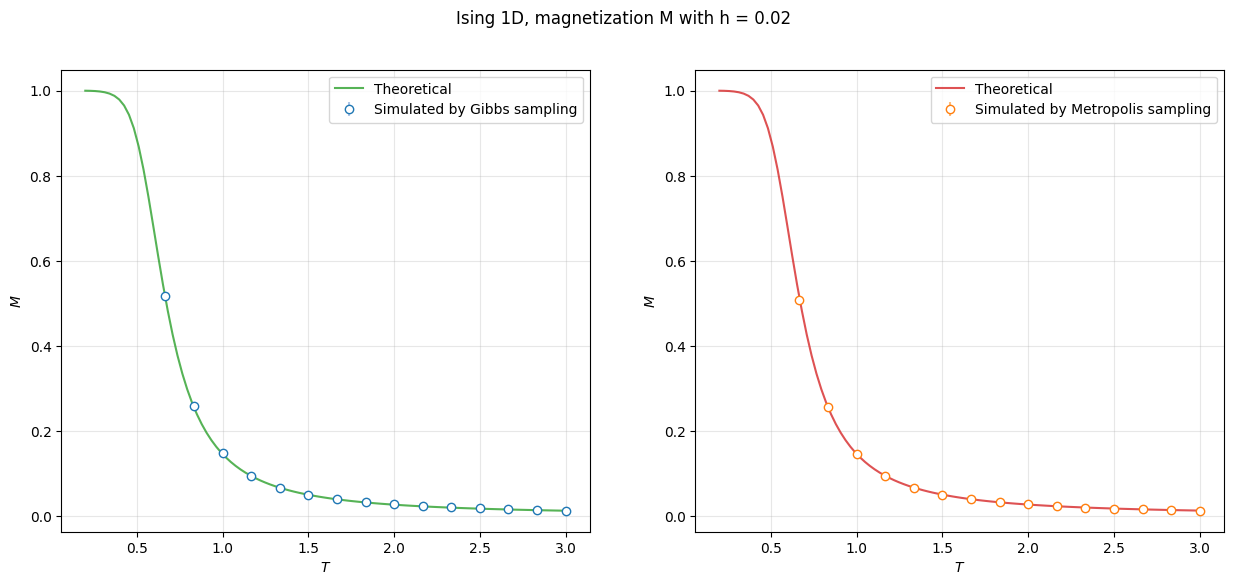

In [93]:
import numpy as np
import matplotlib.pyplot as plt


points = 100
T = np.linspace(0.2, 3.0, num=points)
beta = 1 / T
J = 1.0
Ns = 50
th = np.tanh(J / T)
thN = th**Ns
ch = 1 / th

h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)


out_dir = ['es_06.1/output_gibbs/h_0.02', 'es_06.1/output_metro/h_0.02']
labels = ['Simulated by Gibbs sampling', 'Simulated by Metropolis sampling']
cm = plt.get_cmap('tab20')

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
for i in range(2):
    data = np.loadtxt(out_dir[i] + '/output_mag.dat')
    ax[i].errorbar(data[:, 0], data[:, 2], yerr=data[:, 3], color=cm(2*i), ecolor=cm(2*i+1), label=labels[i], linestyle='', marker='o',mfc='w')
    ax[i].plot(T, M, label='Theoretical',color=cm(4+2*i),alpha=0.8)
    ax[i].set_xlabel('$T$')  
    ax[i].set_ylabel('$M$')  
    ax[i].legend()  
    ax[i].grid('-',alpha=0.3)
    
fig.suptitle('Ising 1D, magnetization M with h = 0.02')

plt.show()


- The **magnetic susceptibility** (with $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} =\\
= \beta\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right]^2 \frac{\exp \left( -\beta H\right)}{Z}
-\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z}
\frac{1}{Z}\frac{\partial Z}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

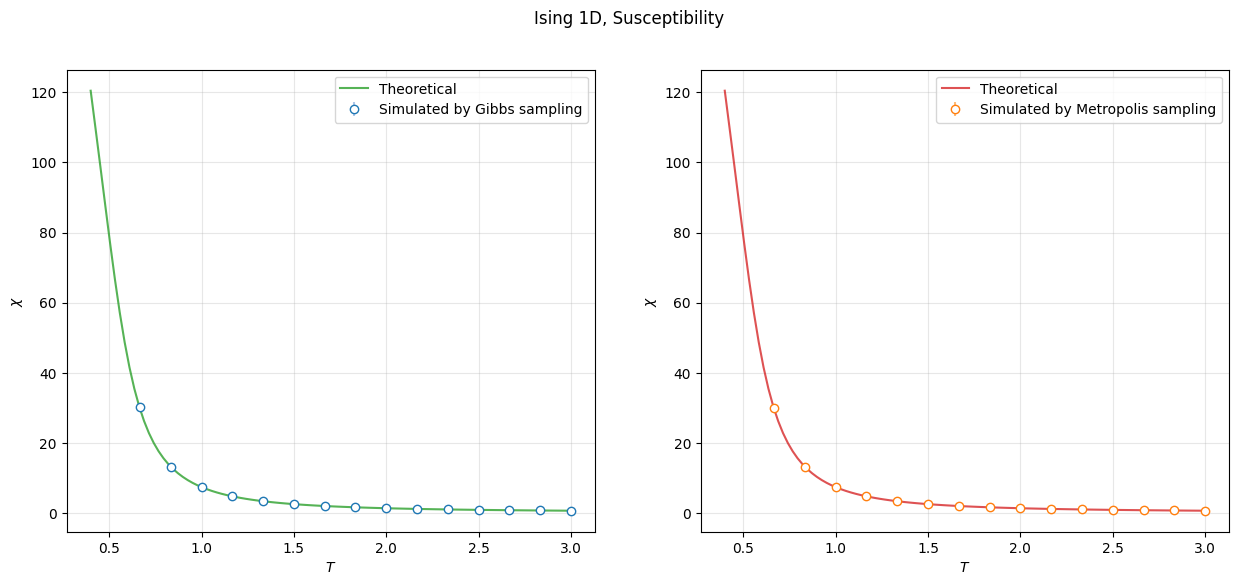

In [94]:
import numpy as np
import matplotlib.pyplot as plt


points=100
T = np.linspace(0.4,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
h=0.02 #external field

X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

out_dir = ['es_06.1/output_gibbs/h_0.00', 'es_06.1/output_metro/h_0.00']
labels = ['Simulated by Gibbs sampling', 'Simulated by Metropolis sampling']
cm = plt.get_cmap('tab20')

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
for i in range(2):
    data = np.loadtxt(out_dir[i] + '/output_x.dat')
    ax[i].errorbar(data[:, 0], data[:, 2], yerr=data[:, 3], color=cm(2*i), ecolor=cm(2*i+1), label=labels[i], linestyle='', marker='o',mfc='w')
    ax[i].plot(T, X, label='Theoretical',color=cm(4+2*i),alpha=0.8)
    ax[i].set_xlabel('$T$')  
    ax[i].set_ylabel('$\chi$')  
    ax[i].legend()  
    ax[i].grid('-',alpha=0.3)
    
fig.suptitle('Ising 1D, Susceptibility')

plt.show()

The plots show the macroscopic properties of a 1D Ising model comprising `nspins=50` spins.

For each quantity, the graphs showcase both theoretical and simulated values, which were obtained using two distinct methods: the Metropolis algorithm and the Gibbs algorithm.

The primary distinction between these two approaches lies in their operation. Metropolis suggests flipping the current spin and determines its execution based on the change in lattice energy. In contrast, the Gibbs algorithm proposes a step independently of the current spin, deciding only whether the spin should be placed up or down to minimize lattice energy. Despite these operational differences, the graphs reveal that both methods yield nearly identical results for each quantity and temperature. This equivalence is notable.

Upon closer examination of the graphs, we can confidently assert that the internal energy, magnetization, and susceptibility align excellently with theoretical predictions.

All simulations employ block averages with `nblk=30` blocks, each comprising `nstep=100,000` steps. Each data point is derived from a well-equilibrated system, with `th_step=100,000` equilibration steps employed for each simulation. The plotted values were calculated after a cumulative total of 30 million steps, which is a substantial number and substantiates the exceptional agreement of the results with the expected values. It's important to clarify that by "step," we refer to an attempt to flip each of the 50 spins comprising the system, not just a single one.